<a href="https://colab.research.google.com/github/willystumblr/AI-ML_Team_5/blob/kms/bike/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

## Data Overview

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. **You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.**

### Data Fields



* `datetime` - hourly date + timestamp
* `season` -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* `holiday` - whether the day is considered a holiday
* `workingday` - whether the day is neither a weekend nor holiday
* `weather` - 
  * `1`: Clear, Few clouds, Partly cloudy, Partly cloudy
  * `2`: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * `3`: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * `4`: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* `temp` - temperature in Celsius
* `atemp` - "feels like" temperature in Celsius
* `humidity` - relative humidity
* `windspeed` - wind speed
* `casual` - number of non-registered user rentals initiated
* `registered` - number of registered user rentals initiated
* `count` - number of total rentals




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike-sharing-demand/test.csv")
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike-sharing-demand/train.csv")

In [4]:
train_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
test_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [6]:
missing_val = pd.DataFrame(train_df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,datetime,0
1,season,0
2,holiday,0
3,workingday,0
4,weather,0
5,temp,0
6,atemp,0
7,humidity,0
8,windspeed,0
9,casual,0


Luckily, we do not have any missing values! Hurray-

In [7]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

import os

`datetime` analysis

In [11]:
combine = train_df.append(test_df)

In [12]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())

In [13]:
combine['year'] = combine.tempDate.apply(lambda x:x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x:x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x:x[0].split('-')[2])
combine['weekday'] = combine.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['hour'] = combine.tempDate.apply(lambda x:x[1].split(':')[0])

In [14]:
combine['year'] = pd.to_numeric(combine.year,errors='coerce')
combine['month'] = pd.to_numeric(combine.month,errors='coerce')
combine['day'] = pd.to_numeric(combine.day,errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour,errors='coerce')

In [15]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",2011,1,1,Saturday,4


In [17]:
combine = combine.drop(['tempDate','datetime'], axis=1)

In [18]:
combine.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,Saturday,0
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,Saturday,1
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,Saturday,2
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,Saturday,3
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,Saturday,4


In [19]:
train_df = combine[:len(train_df)]
test_df = combine[len(train_df):]

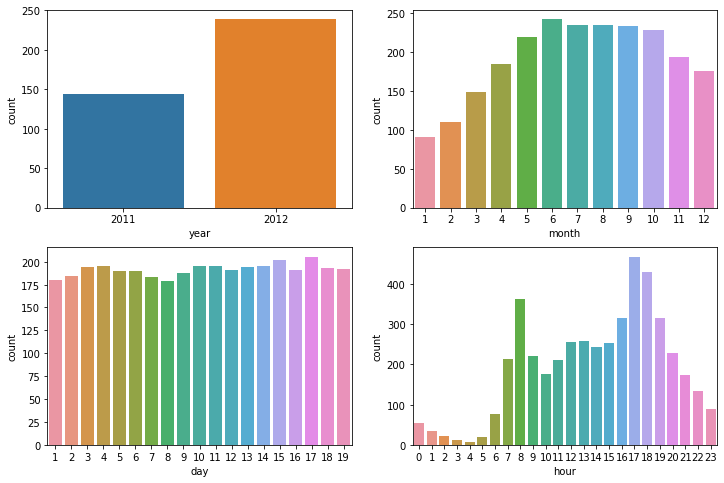

In [23]:
fig = plt.figure(figsize=[12,8])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train_df.groupby('year')['count'].mean().reset_index())

#month
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train_df.groupby('month')['count'].mean().reset_index())

#day
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train_df.groupby('day')['count'].mean().reset_index())

#hour
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train_df.groupby('hour')['count'].mean().reset_index())


`hour`가 중요한 feature로 보인다.

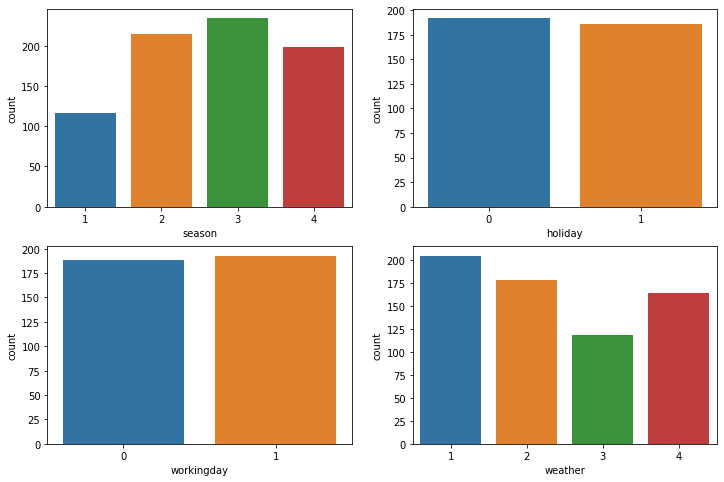

In [25]:
#season
fig = plt.figure(figsize=[12,8])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train_df.groupby('season')['count'].mean().reset_index())

#holiday
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train_df.groupby('holiday')['count'].mean().reset_index())

#workingday
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train_df.groupby('workingday')['count'].mean().reset_index())

#weather
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train_df.groupby('weather')['count'].mean().reset_index())

봄에 적게 타는 편이고, "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"의 날씨일 때 적게 탄다. 신기한 일이 아닐 수 없다.

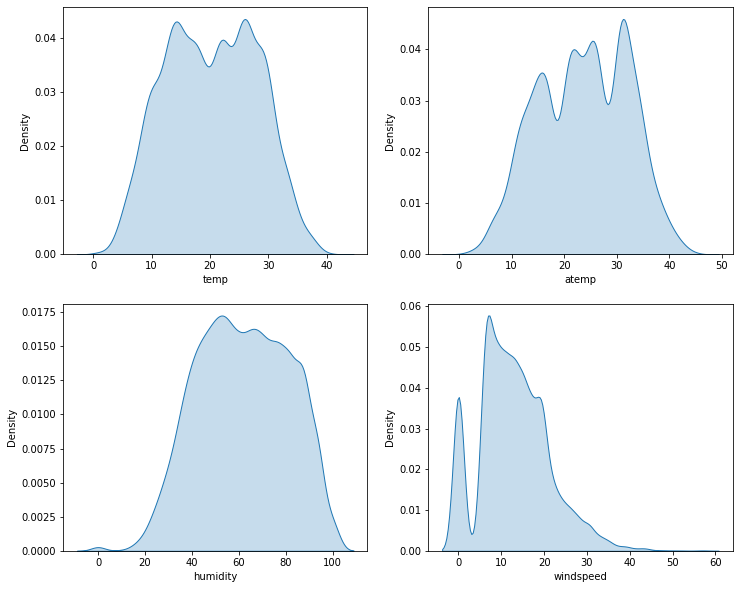

In [49]:
#temp
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.kdeplot(train_df['temp'], shade=True, label='Temperature')

#atemp
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.kdeplot(train_df['atemp'], shade=True, label='Temperature')

#humidity
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.kdeplot(train_df['humidity'], shade=True, label='Temperature')

#windspeed
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.kdeplot(train_df['windspeed'], shade=True, label='Temperature')

`windspeed` 값이 0인 경우가 매우 많다. 뭐지?

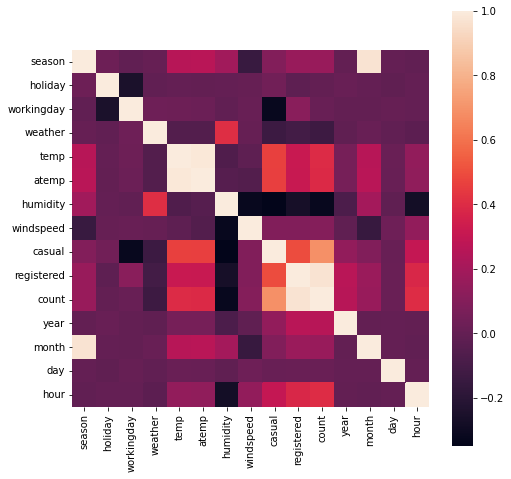

In [32]:
fig = plt.figure(figsize=[8,8])
ax = sns.heatmap(train_df.corr(),annot=False,square=True)

i) hour-season corelation

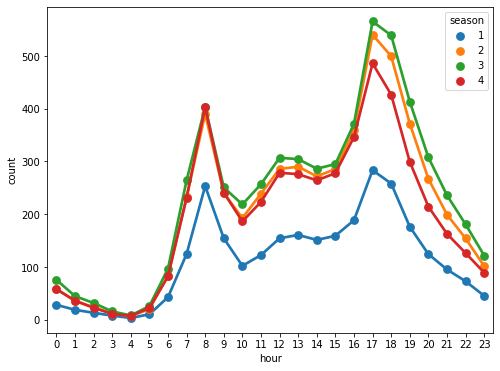

In [34]:
fig = plt.figure(figsize=[8,6])
sns.pointplot(x='hour',y='count',hue='season',data=train_df.groupby(['season','hour'])['count'].mean().reset_index())

거의 비슷한데 그저 봄일 때 수치가 낮을 뿐임

ii) weekday-hour correlation

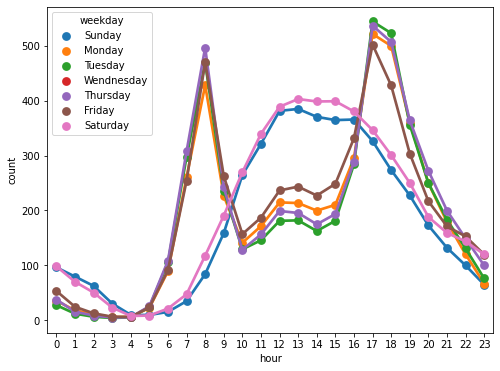

In [38]:
fig = plt.figure(figsize=[8,6])
sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train_df.groupby(['weekday','hour'])['count'].mean().reset_index())

weekday와 weekend로 데이터를 가공할 수 있겠다.

In [39]:
combine['weekend'] = combine['weekday'].apply(lambda x: 1 if x =='Saturday' or x=='Sunday' else 0)

In [44]:
combine = combine.drop('weekday', axis=1)

In [45]:
train_df = combine[:len(train_df)]
test_df = combine[len(train_df):]

In [46]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekend
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,1
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,2,1
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,3,1
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,4,1


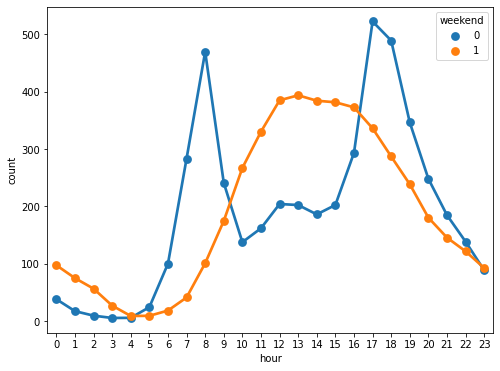

In [47]:
fig = plt.figure(figsize=[8,6])
sns.pointplot(x='hour',y='count',hue='weekend',hue_order=[0, 1],data=train_df.groupby(['weekend','hour'])['count'].mean().reset_index())

깰꼼..

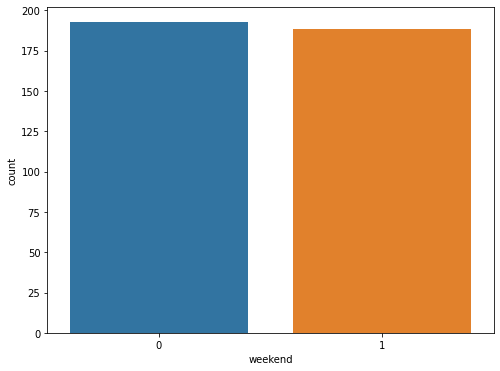

In [50]:
fig = plt.figure(figsize=[8,6])
sns.barplot(x='weekend',y='count',data=train_df.groupby('weekend')['count'].mean().reset_index())

가공은 했으나 별반 다를 것이 없어보인다.